Initial weights to [middle layer]
 [[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]
Initial weights to [output layer]
 [[0.38344152 0.79172504]
 [0.52889492 0.56804456]
 [0.92559664 0.07103606]
 [0.0871293  0.0202184 ]]
Output of network before learning
[0 0] [0.54587617 0.45412383]
[0 1] [0.58185528 0.41814472]
[1 0] [0.5650508 0.4349492]
[1 1] [0.5927264 0.4072736]
-------------
i= 500 0.46758233682971884
-------------
i= 1000 0.34506739017164106
-------------
i= 1500 0.07592445483421204
-------------
i= 2000 0.01917353151870763
-------------
i= 2500 0.009655997485365489
-------------
i= 3000 0.006231540321380914
-------------
i= 3500 0.004532067555591577
-------------
i= 4000 0.003532820997115091
-------------
i= 4500 0.0028807633098403805
-------------
i= 5000 0.0024242320704959738
-------------
Network output after learning
[0 0] [0.03468951 0.96531049]
[0 1] [0.9656252 0.0343748]
[1 0] [0.96667787 0.03332213]
[1 1] [0.03

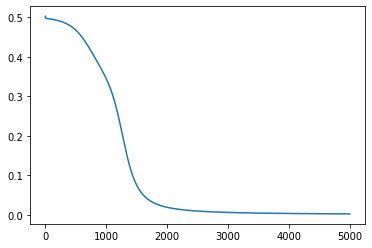

In [2]:
# Learn neural network learning by gradient method
import numpy as np
import matplotlib.pyplot as plt

weight_to_middle_layer = []
weight_to_output_layer = []
for_recording_errors = []

inputs_matrix  = np.array([[0,0],[0,1],[1,0],[1,1]])  

correct_answer_matrix = np.array([[0,1],[0,1],[0,1],[1,0]])  #probability_when_AND
correct_answer_matrix = np.array([[0,1],[1,0],[1,0],[1,0]])  #probability_when_OR
correct_answer_matrix = np.array([[1,0],[1,0],[1,0],[0,1]])  #probability_when_NAND
correct_answer_matrix = np.array([[0,1],[1,0],[1,0],[0,1]])  #probability_when_XOR

number_of_repetitions = 5000
learning_rate = 0.2 # Learning rate of gradient method

def network_initialization(number_of_input_layer_nodes, number_of_middle_layer_nodes, number_of_output_layer_nodes):
    global weight_to_middle_layer,weight_to_output_layer
    np.random.seed(0) # Seed of random number
    weight_to_middle_layer = np.random.rand(number_of_input_layer_nodes+1,number_of_middle_layer_nodes) # Determine weight randomly
    weight_to_output_layer = np.random.rand(number_of_middle_layer_nodes+1,number_of_output_layer_nodes)# Determine weight randomly

def loss_function(input,correct):
    output = calculate_from_input_to_output(input,weight_to_middle_layer,weight_to_output_layer)
    number_of_matrix_elements = output.shape[0] # Number of rows x number of columns
    return(np.sum(np.power(output-correct,2))/number_of_matrix_elements) # Return the mean square error

def numerical_differentiation(fnction, current_location):
    small_changes = 0.01
    slope = np.zeros_like(current_location) # First zero fill
    iteration = np.nditer(current_location, flags=['multi_index']) # Access all elements of matrix
    while not iteration.finished: # Until access is completed
        i = iteration.multi_index # Get index number (like 0,0)
        temp_value = current_location[i]
        current_location[i] = temp_value + small_changes
        function_value_when_increased_slightly = fnction(current_location)               
        current_location[i] = temp_value - small_changes
        function_value_when_decreased_slightly = fnction(current_location)        

        slope[i] = (function_value_when_increased_slightly-function_value_when_decreased_slightly)/(2*small_changes) # Slope
        current_location[i] = temp_value # Back before increasing or decreasing
        iteration.iternext()   # Go to next iteration
    return slope
 
def sigmoid_function(x): # Activation function in the middle layer
    return 1/(1+np.exp(-x))    
 
def softmax_function(x): # Used to convert output from output layer to probability
    exp_x = np.exp(x)
    return exp_x / np.sum(np.exp(x), axis=1, keepdims=True)

def calculate_from_input_to_output(x,weight_to_middle_layer,weight_to_output_layer): 
    # Add the bias neuron and make the value of each node in the input layer
    input_layer_value = np.insert(x,0,1,axis=1) 
    # Multiply  weight, And sum
    temporary_value_of_middle_layer = np.dot(input_layer_value,weight_to_middle_layer) 
    # Apply the activation function and make the value of each node in the middle layer
    middle_layer_value = sigmoid_function(temporary_value_of_middle_layer) 
    # Bias neurons are also added, and make the value of each node in the middle layer
    middle_layer_value = np.insert(middle_layer_value,0,1,axis=1) 
    # Multiply  weight, And sum
    temporary_value_of_output_layer = np.dot(middle_layer_value,weight_to_output_layer) 
    # Output is probability
    output_layer_value = softmax_function(temporary_value_of_output_layer) 
    return output_layer_value

############### From here main processing  ###############

network_initialization(number_of_input_layer_nodes=2, number_of_middle_layer_nodes=3, number_of_output_layer_nodes=2)

print("Initial weights to [middle layer]\n",weight_to_middle_layer)
print("Initial weights to [output layer]\n",weight_to_output_layer)
 
print("Output of network before learning")
output_before_learning = calculate_from_input_to_output(inputs_matrix ,weight_to_middle_layer,weight_to_output_layer)
number_of_rows_in_input_matrix = inputs_matrix .shape[0]

for i in range(number_of_rows_in_input_matrix):
    print(inputs_matrix [i],output_before_learning[i])

############### Start learning ###############
    
for i in range(number_of_repetitions):
    anonymous_loss_function = lambda weight: loss_function(inputs_matrix ,correct_answer_matrix)    

    weights_slope_to_middle_layer=numerical_differentiation(anonymous_loss_function,weight_to_middle_layer)
    weights_slope_to_output_layer=numerical_differentiation(anonymous_loss_function,weight_to_output_layer)
    
    weight_to_middle_layer -= learning_rate * weights_slope_to_middle_layer # Update weights
    weight_to_output_layer -= learning_rate * weights_slope_to_output_layer # Update weights  
    
    loss_function_value=loss_function(inputs_matrix ,correct_answer_matrix)
    for_recording_errors.append(loss_function_value)    
    
    if (((i+1) % 500) == 0):
        print("-------------")
        print("i=",i+1,loss_function_value)

############### Complete learning ###############

print("-------------") 
print("Network output after learning")
output_after_learning = calculate_from_input_to_output(inputs_matrix ,weight_to_middle_layer,weight_to_output_layer)

for i in range(number_of_rows_in_input_matrix):
    print(inputs_matrix [i],output_after_learning[i])

################ Display the process of reducing errors ################
x = np.arange(0,number_of_repetitions,1)
plt.plot(x,for_recording_errors)
plt.show()   